<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn
    - 평가
    - 분류
    - 회귀
    - 차원축소 / 군집
    - 텍스트 처리

8. 딥러닝

# 학습

<파이썬을 이용한 빅데이터 분석, 유성준>


학습 : 어떤 작업의 성능이 경험을 통해서 향상되면 이것을 학습이라고 합니다.

특성 (Feature) : 각각의 아이템을 설명하는데 사용하는 구분 가능한 특성, 또는 특성의 개수
예> 오토바이와 자동차를 잘 구분하는 특성은 바퀴의 개수가 될 수 있다.

특성의 개수가 많으면 머신 러닝의 성능이 좋아 질 가능성도 커지지만 그 만큼 계산량이 많아져, 특성의 수를 적당히 줄이는 작업도 필요하다.

클래스 : 분류 된 결과가 어느 분야(클래스)에 속하는지를 나타낸다. 예> 머핀과 컵케이크, 자동차와 오토바이, 생명체와 무생물


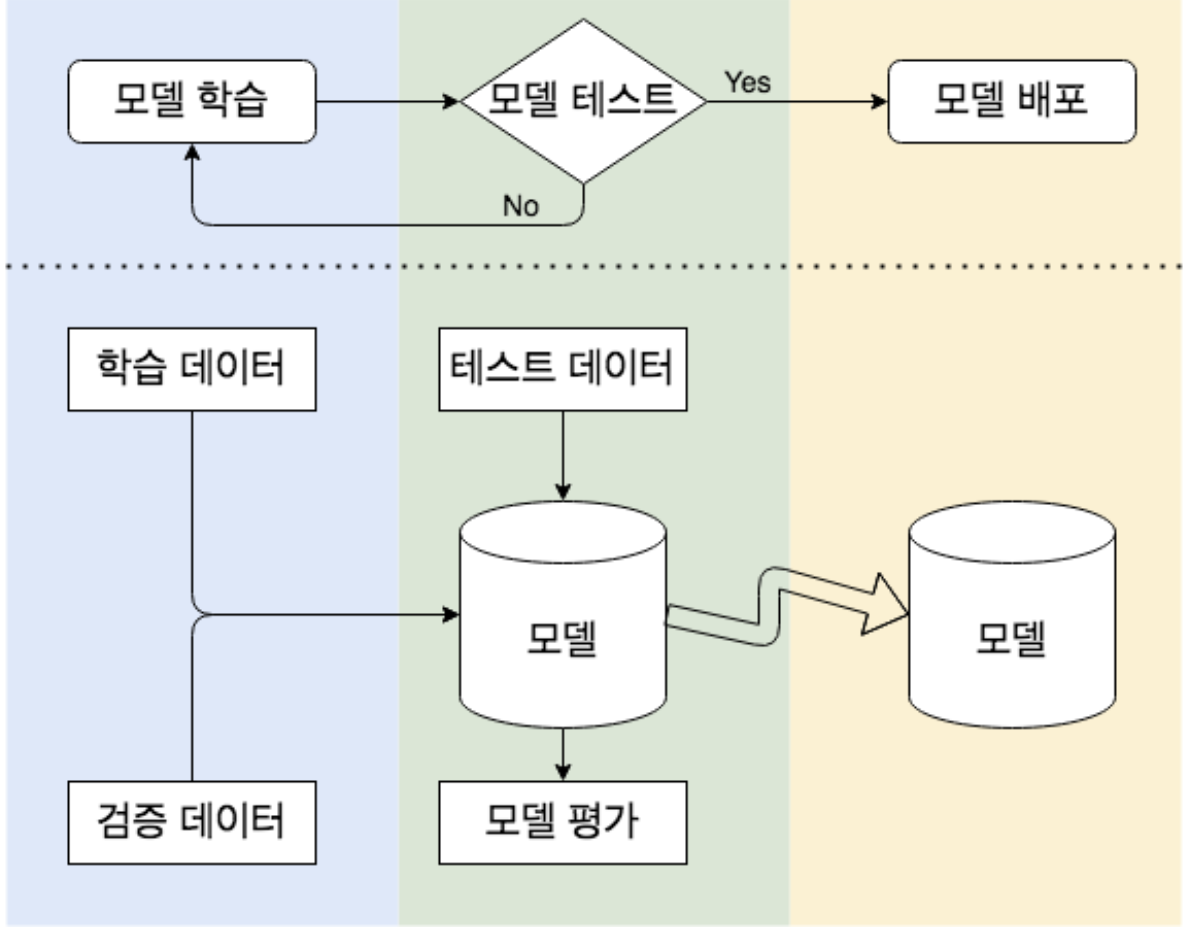

In [ ]:
data = {'x':[13, 19, 16, 14, 15, 18],
        'y' : [40, 83, 62, 57, 58, 63]}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,57
4,15,58
5,18,63


<Axes: xlabel='x', ylabel='y'>

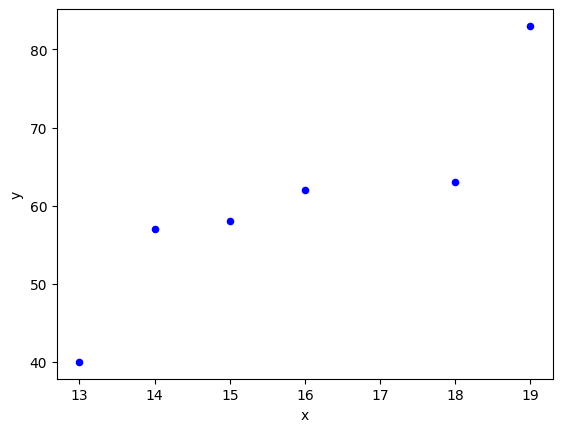

In [ ]:
data.plot(kind='scatter', x='x', y='y', color='blue')

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
X = pd.DataFrame(data['x'])

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
lr.fit(X, data.y) #학습 시키는 것

LinearRegression()

In [ ]:
lr.coef_ # y = ax + b 에서 a 값

array([5.34782609])

In [ ]:
lr.intercept_ # b 값

-24.173913043478294

In [ ]:
prediction = lr.predict(data['x'].values[:, np.newaxis])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
prediction

array([45.34782609, 77.43478261, 61.39130435, 50.69565217, 56.04347826,
       72.08695652])

In [ ]:
data['x'].values[:, np.newaxis]

array([[13],
       [19],
       [16],
       [14],
       [15],
       [18]])

Text(17.7, 61.5, '$(x_2, y_2)$')

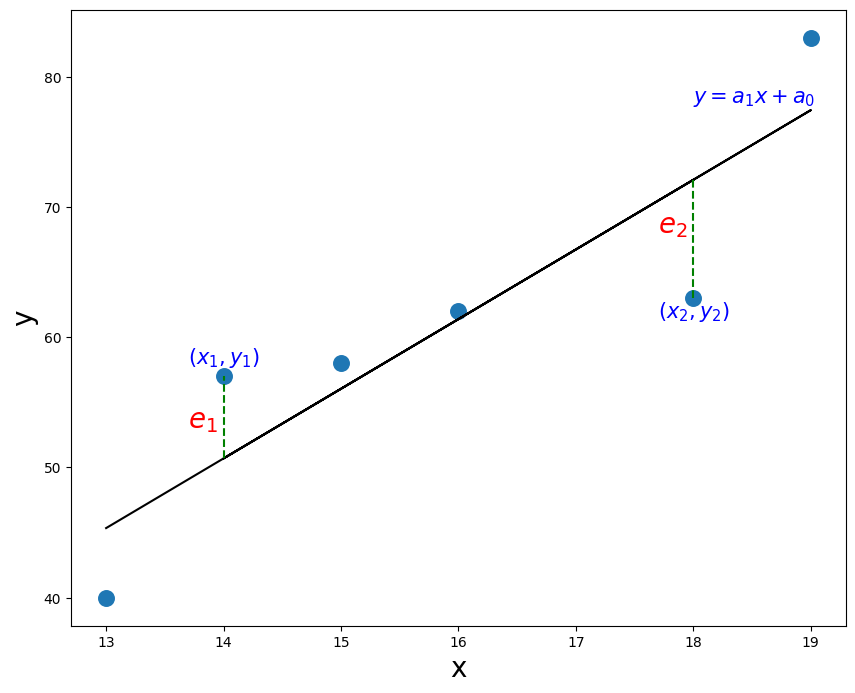

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data.x, data.y, s=125)
plt.plot(data.x, prediction, color='black')
plt.vlines(14, 50.7, 57, colors='green', linestyle='--')
plt.vlines(18, 63, 72.09, colors='green', linestyle='--')
plt.text(13.7, 53, r'$e_1$', size=20, color='red')
plt.text(17.7, 68, r'$e_2$', size=20, color='red')
plt.text(18, 78, r'$y=a_1 x + a_0$',size=15, color='blue')
plt.ylabel('y', size=20)
plt.xlabel('x', size=20)
plt.text(13.7, 58, r'$(x_1, y_1)$', size=15, color='blue')
plt.text(17.7, 61.5, r'$(x_2, y_2)$', size=15, color='blue')

x + y = 20

2x + 4y = 56

for i in range(20):


잔차 = 실제값 - 예측값

그림에서 e1, e2 가 잔차 임

In [ ]:
residuals = data['y'] - prediction

In [ ]:
for i in range(len(residuals)):
    print(data['y'][i], '-', np.round(prediction[i], 2), '=', np.round(residuals[i], 2))

40 - 45.35 = -5.35
83 - 77.43 = 5.57
62 - 61.39 = 0.61
57 - 50.7 = 6.3
58 - 56.04 = 1.96
63 - 72.09 = -9.09


$a_1 = a$

$a_0 = b$

$$e_1 = y_1 - (a_1 x_1 + a_0) \\ $$



$$e_2 = y_2 - (a_1 x_2 + a_0) \\ $$



$$\therefore \ e_i = y_i - (a_1 x_i + a_0) \\ $$


>>>> 직선을 어떻게 그려야 하는가 ?

>>>> $ \sum e_i $ 가 제일 작게 그리면 된다!.

$$ min\ \sum_{i=1}^{n}\ e_i = min\ \sum_{i=1}^{n}\ y_i - a_1 x_i - a_0 \\ $$

>>>> $e_i$ 가 +, - 부호가 모두 있으므로, residual의 적절한 척도가 되지 않는다 => 제곱을 하자.

$$ S =\ min\ \sum_{i=1}^{n}\ e_i^2\ =\ min\ \sum_{i=1}^{n}\ (y_i - a_1 x_i - a_0 ) ^ 2 \\ $$

>>>> Least Square form 이 되었다. => 2차 방정식의 최소값 => 미분해서 0 인 지점의 값

>>>> $ {\partial\ S \over \partial\ a_1}\ =\ 0 \ $ 이고, $ {\partial\ S \over \partial\ a_0}\ =\ 0 \ $ 인, $a_1, \ a_0 \ $ 를 찾아야 한다.

$$  {\partial\ S \over \partial\ a_1}\ =\ {\partial  \over \partial a_1}\sum_{i=1}^{n}\ (y_i - a_1 x_i - a_0 )^2\ =\ 0 \\ $$

$$  {\partial\ S \over \partial\ a_0}\ =\ {\partial  \over \partial a_0}\sum_{i=1}^{n}\ (y_i - a_1 x_i - a_0 )^2\ =\ 0 \\ $$

$$  {\partial\ S \over \partial\ a_0}\ =\ {\partial \ \over \partial a_0 }\ (y_1 - a_1 x_1 - a_0 )^2\ + {\partial \ \over \partial a_0 }\ (y_2 - a_1 x_2 - a_0 )^2\ + \cdots \\ $$

$$ y = \{f(x)\}^n \quad \quad \quad y' =\ n \cdot  \{f(x)\}^{n-1} \cdot f'(x) \\ $$

$$  {\partial\ S \over \partial\ a_0}\ =\ 2 \cdot \ (y_1 - a_1 x_1 - a_0 ) \cdot(-1) \ + 2 \cdot \ (y_2 - a_1 x_2 - a_0 ) \cdot (-1) \ + \cdots \\ $$

$$  =\ (-2) \cdot \ \sum_{i=1}^n \ (y_i - a_1 x_i - a_0) \\ $$

$$  {\partial\ S \over \partial\ a_0}\ =\ 2 \cdot \  \sum_{i=1}^n \ (y_i - a_1 x_i - a_0)^{2-1} \cdot {\partial (y_i - a_1 x_i - a_0) \over \partial a_0}\ =\ (-2) \cdot \ \sum_{i=1}^n \ (y_i - a_1 x_i - a_0) \\  $$

>>>> sum 을 풀어서 하는 것과 sum을 있는 그대로 하는 미분은 같은 결과이다.


$$  {\partial\ S \over \partial\ a_0}\ =\ (-2) \cdot \ \sum_{i=1}^n \ (y_i - a_1 x_i - a_0) \ = 0 \\   $$

$$  \ \sum_{i=1}^n \ (y_i - a_1 x_i - a_0) \ = 0 \\   $$

$$  \ \sum \ y_i \ =\  a_1 \cdot \left( \sum x_i \right)+ n \ a_0 \  \cdots \cdots (1) \\   $$

$$  {\partial\ S \over \partial\ a_1}\ =\ {\partial  \over \partial a_1}\sum_{i=1}^{n}\ (y_i - a_1 x_i - a_0 )^2\ =\ 0 \\ $$

$$  {\partial\ S \over \partial\ a_0}\ =\ (2 ) \cdot \ \sum_{i=1}^n \ (y_i - a_1 x_i - a_0) \cdot (-x_i) \ = 0 \\   $$

$$ \sum_{i=1}^n \ (y_i \ x_i- a_1 x_i ^2 - a_0 \ x_i) \ = 0 \\   $$



$$ \sum  \ y_i \ x_i \ = \ \left( \sum x_i ^2 \right )\ a_1 \ + \ \left( \sum \ x_i \right) \ a_0\ \cdots \cdots (2) \\ $$


$$  \ \sum \ y_i \ =\ \left( \sum x_i \right) \  a_1 + \ n \ a_0 \  \cdots \cdots (1) \\   $$

$$ a_1 = {n \sum y_i \ x_i - \sum y_i \sum x_i  \over n \sum x_i^2 - \left( \sum x_i \right) ^2 }\\ $$

>>>>  또한 (1)식으로 부터

$$ a_0 = {\sum y_i \over n } - {\sum x_i \over n} \ \cdot a_1 \ =\ \bar{y} - \bar{x} \cdot a_1 \\ $$

In [ ]:
x = data.x.values

In [ ]:
x

array([13, 19, 16, 14, 15, 18])

In [ ]:
y = data.y.values

In [ ]:
y

array([40, 83, 62, 57, 58, 63])

In [ ]:
data.x.count()

6

$$ a_1 = {n \sum y_i \ x_i - \sum y_i \sum x_i  \over n \sum x_i^2 - \left( \sum x_i \right) ^2 }\\ $$

In [ ]:
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_square = np.sum(x*x)
sum_xy = np.sum(x*y)
n = data.x.count()

In [ ]:
a_1 = (n*sum_xy - sum_x*sum_y) / (n*sum_x_square - sum_x * sum_x)

In [ ]:
a_1

5.3478260869565215

In [ ]:
a_0 = np.mean(y) - np.mean(x)*a_1

In [ ]:
a_0

-24.173913043478265

In [ ]:
np.polyfit(x, y, 1)

array([  5.34782609, -24.17391304])

# 분류

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
keys = iris.keys()

In [ ]:
keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

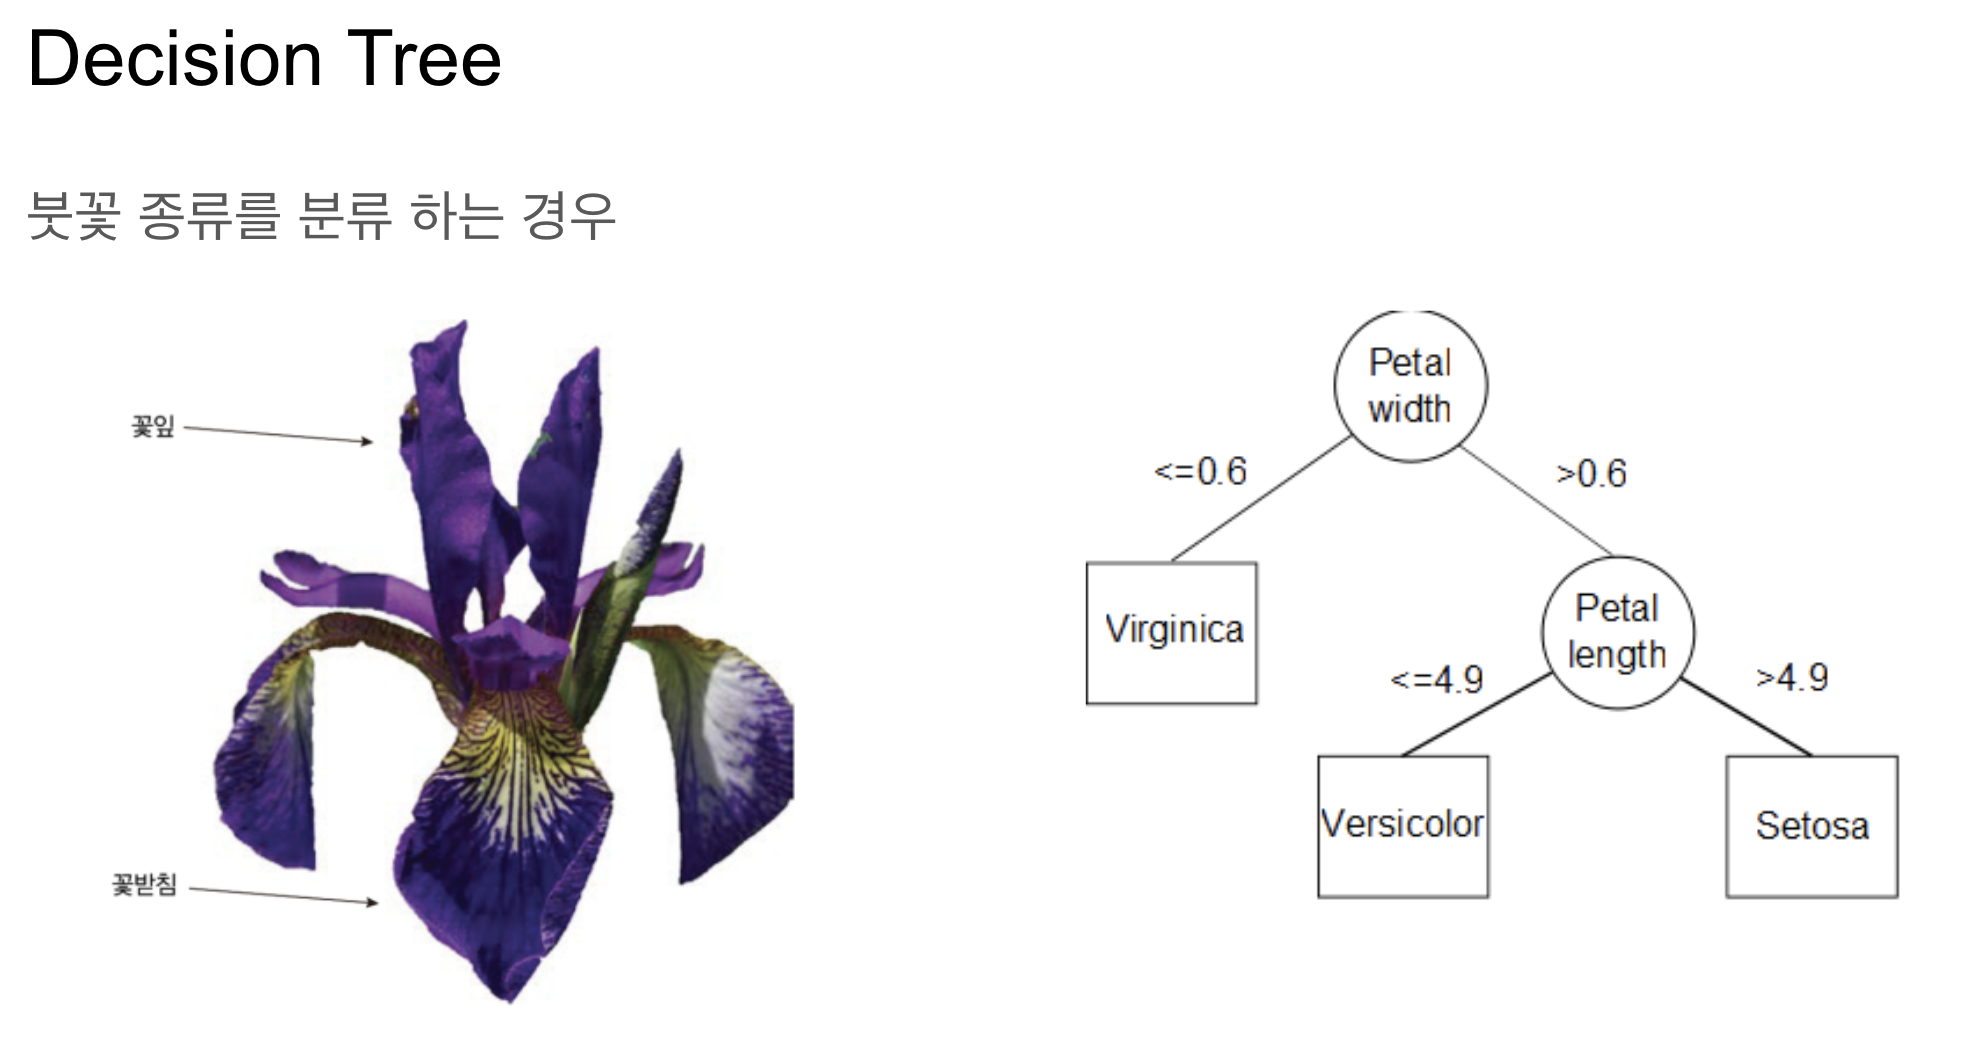

In [ ]:
iris.data

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_df['label'] = iris.target

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

#데이터를 train 과 test 데이터로 분할

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2)

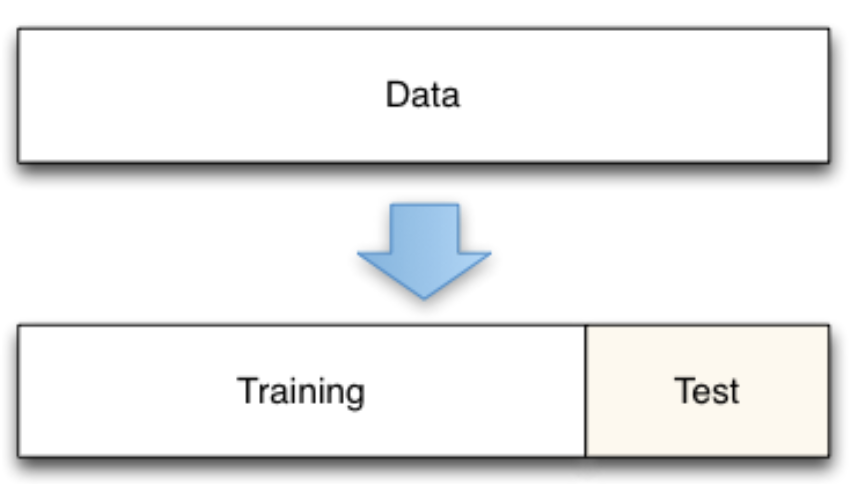

In [ ]:
X_train

In [ ]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [ ]:
y_train.shape, y_test.shape

((120,), (30,))

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=2)

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [ ]:
pred = dt_clf.predict(X_test)

In [ ]:
y_test, pred

(array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
        2, 1, 1, 0, 0, 2, 0, 2]),
 array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
        2, 1, 1, 0, 0, 2, 0, 2]))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, pred)

0.9333333333333333